Join graphs works, do not use consolidate intersections!! it messes everything up

I have only implemented join walk, drive

In [2]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
from random import randint
import pickle

%matplotlib inline

In [2]:
ox.config(use_cache=True)

# Get all net types

In [47]:
G = ox.graph_from_address('Plaça Catalunya, Barcelona, Spain', dist = 100, network_type = 'drive')
#G_w = ox.graph_from_address('Plaça Catalunya, Barcelona, Spain', dist = 200, network_type = 'walk')
#G_c = ox.graph_from_address('Plaça Catalunya, Barcelona, Spain', dist = 200, network_type = 'drive')
#G_b = ox.graph_from_address('Plaça Catalunya, Barcelona, Spain', dist = 200, network_type = 'bike')
#ox.plot_graph(G,bgcolor='w', edge_color= 'r', node_color = 'black')
print(len(G.nodes))
print(len(G.edges))

49
136


In [28]:
? ox.plot_graph

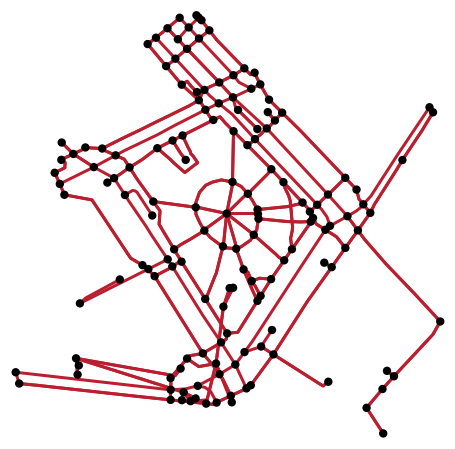

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [43]:
ox.plot_graph(G,bgcolor='w', edge_color= '#bb1f2f', node_color = 'k', node_size = 70, edge_linewidth = 3)

In [19]:
nodes, edges = ox.graph_to_gdfs(G)
edges
(edges.loc[edges['highway'] = 'footway'])

,osmid,oneway,lanes,name,highway,maxspeed,length,geometry,width,access,service,tunnel,u,v,key
9,663272026,False,NaN,Avinguda del Portal de l'Àngel,pedestrian,NaN,16.295,"LINESTRING (2.17138 41.38698, 2.17144 41.38692...",NaN,delivery,NaN,NaN,216350784,8204882830,0
256,663272026,False,NaN,Avinguda del Portal de l'Àngel,pedestrian,NaN,16.295,"LINESTRING (2.17149 41.38687, 2.17144 41.38692...",NaN,delivery,NaN,NaN,8204882830,216350784,0


# Get one by one net types

## Car

In [50]:
with open("pickle_objects/drive.p", 'rb') as f:
    %time G_drive= pickle.load(f)
print(len(G_drive.nodes))
print(len(G_drive.edges))

CPU times: user 114 ms, sys: 4.05 ms, total: 118 ms
Wall time: 123 ms
8750
16464


In [49]:
for edge_id in G_drive.edges:
    G_drive.edges[edge_id]['Type'] = 'Car'
for node_id in G_drive.nodes:
    G_drive.nodes[node_id]['Type'] = 'Car'    

In [54]:
G_drive.edges[(21638845, 885308258, 0)], G_drive.nodes[30295525]

({'osmid': 554707785,
  'oneway': True,
  'lanes': '2',
  'name': 'Passeig de Joan de Borbó',
  'highway': 'residential',
  'maxspeed': '30',
  'length': 28.335,
  'Type': 'Car'},
 {'y': 41.4331385, 'x': 2.1848466, 'osmid': 30295525, 'Type': 'Car'})

### Same as above
nodes, edges = ox.graph_to_gdfs(G_drive)

edges['Type'] = 'Car'

G_drive = ox.graph_from_gdfs(nodes, edges)

## Bike

In [10]:
with open("pickle_objects/bike.p", 'rb') as f:
    %time G_bike = pickle.load(f)
print(len(G_bike.nodes))
print(len(G_bike.edges))

CPU times: user 288 ms, sys: 21.4 ms, total: 309 ms
Wall time: 316 ms
16953
35423


In [11]:
for edge_id in G_bike.edges:
    G_bike.edges[edge_id]['Type'] = 'Bike'
for node_id in G_bike.nodes:
    G_bike.nodes[node_id]['Type'] = 'Bike'

### Same as above
nodes, edges = ox.graph_to_gdfs(G_bike)

edges['Type'] = 'Bike'

G_bike = ox.graph_from_gdfs(nodes, edges)

## Walk

In [55]:
with open("pickle_objects/walk.p", 'rb') as f:
    %time G_walk = pickle.load(f)
print(len(G_walk.nodes))
print(len(G_walk.edges))

CPU times: user 1.41 s, sys: 609 ms, total: 2.02 s
Wall time: 2.18 s
66916
210672


In [57]:
#G_walk_simp = ox.consolidate_intersections(ox.project_graph(G_walk), rebuild_graph=True, tolerance=8, dead_ends=True)

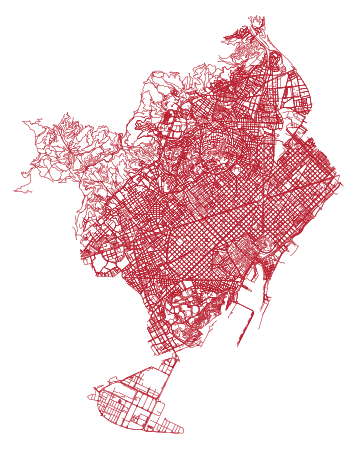

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [62]:
ox.plot_graph(G_walk_simp,bgcolor='w', edge_color= '#bb1f2f', node_color = 'k', node_size = 0, edge_linewidth = 0.3)

In [55]:
for edge_id in G_walk.edges:
    G_walk.edges[edge_id]['Type'] = 'Walk'
for node_id in G_walk.nodes:
    G_walk.nodes[node_id]['Type'] = 'Walk'

### Same as above
nodes, edges = ox.graph_to_gdfs(G_walk)

edges['Type'] = 'Walk'

G_walk = ox.graph_from_gdfs(nodes, edges)

## Tram

In [ ]:
G_tram = ox.load_graphml("../BCNgraphs/tram.graphml")
ox.plot_graph(G_tram)
print(len(G_tram.nodes))
print(len(G_tram.edges))

In [37]:
# Load List of graphs
with open("../../GTFS/Graphs/Prova/20210326.p", 'rb') as f:
    G_tram = pickle.load(f)
print(len(G_tram.nodes))
print(len(G_tram.edges))

13
12


In [56]:
for edge_id in G_tram.edges:
    G_tram.edges[edge_id]['Type'] = 'Tram'
for node_id in G_tram.nodes:
    G_tram.nodes[node_id]['Type'] = 'Tram'

## Subway

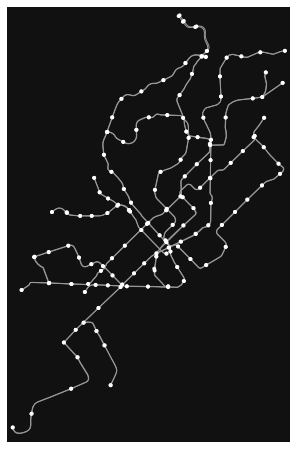

289
266


In [42]:
G_subway = ox.load_graphml("../../BCNgraphs/subway.graphml")
ox.plot_graph(G_subway)
print(len(G_subway.nodes))
print(len(G_subway.edges))

# Add speeds

In [15]:
hwy_speeds_car = {'residential': 35,
            'living_street': 20,
            'primary': 120,
            'secondary': 80,
            'tertiary': 60,
            'service': 20}

G_drive = ox.add_edge_speeds(G_drive, hwy_speeds_car)
G_drive = ox.add_edge_travel_times(G_drive)

In [16]:
hwy_speeds_walk = {'residential': 4,
            'living_street': 4,
            'secondary': 4,
            'tertiary': 4,
            'service': 4,
            'pedestrian': 4}

G_walk = ox.add_edge_speeds(G_walk, hwy_speeds_walk)
G_walk = ox.add_edge_travel_times(G_walk)

In [17]:
hwy_speeds_bike = {'residential': 20,
            'living_street': 15,
            'secondary': 25,
            'tertiary': 25,
            'service': 15}

G_bike = ox.add_edge_speeds(G_bike, hwy_speeds_bike)
G_bike = ox.add_edge_travel_times(G_bike)

# Join the graphs

## All Time Independent

In [ ]:
nx.compose_all?

In [ ]:
G_union = nx.compose_all([G_drive,G_drive,G_walk])
ox.plot_graph(G_union, node_size = 0)
print(len(G_union.nodes))
print(len(G_union.edges))

In [ ]:
G_union_proj = ox.project_graph(G_union)

In [ ]:
# Dump graph
with open("pickle_objects/road_network_projected.p", 'wb') as f:
    pickle.dump(G_union_proj, f)

## walk, drive

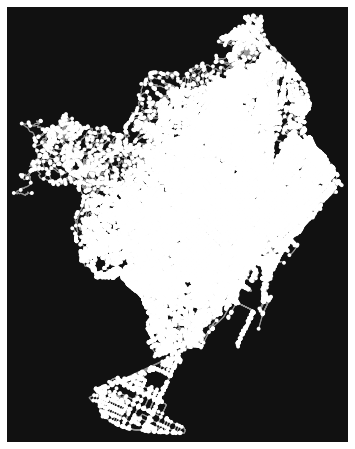

67398
222749


In [18]:
G_union = nx.compose(G_drive,G_walk)
ox.plot_graph(G_union)
print(len(G_union.nodes))
print(len(G_union.edges))

### Check nodes and edges

In [ ]:
nodes, edges = ox.graph_to_gdfs(G_bike)

In [ ]:
nodes

In [ ]:
edges

In [ ]:
union_nodes, union_edges = ox.graph_to_gdfs(G_union)
union_nodes
#union_edges.loc[union_edges['highway']=='living_street']

In [ ]:
#union_edges.dropna(axis=1, how='any') 
union_edges

### Routing 

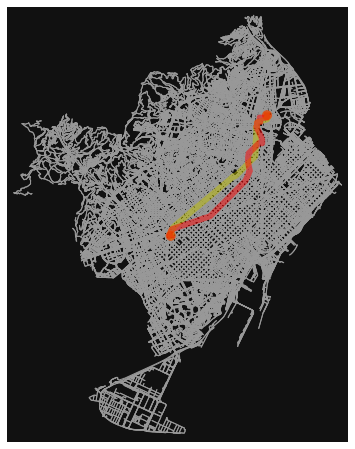

from 8197555141 path to 8495301693


In [22]:
# find the shortest path (by distance) between these nodes then plot it
orig = list(G_union)[randint(0,len(G_union)-1)]
dest = list(G_union)[randint(0,len(G_union)-1)]
route1 = ox.shortest_path(G_union, orig,dest, weight='length')
route2 = ox.shortest_path(G_union, orig,dest, weight='travel_time')
# plot the routes
fig, ax = ox.plot_graph_routes(G_union, routes=[route1, route2], route_colors=['y', 'r'],
                           route_linewidth=6, node_size=0)
print("from {} path to {}".format(orig, dest))


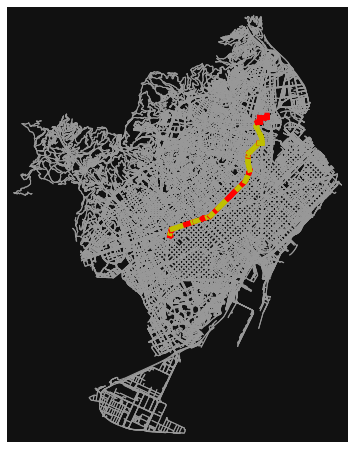

In [24]:
node_pairs = zip(route2[:-1], route2[1:])
# plot graph
fig, ax = ox.plot_graph(G_union, show=False, close=False, node_size = 0)

# then plot colored route segments on top of it
for (u, v) in node_pairs:
    data = min(G_union.get_edge_data(u, v).values(), key=lambda d: d["travel_time"])
    #print(data['Type'])
    if "geometry" in data:
        x, y = data["geometry"].xy
    else:
        x = G_union.nodes[u]["x"], G_union.nodes[v]["x"]
        y = G_union.nodes[u]["y"], G_union.nodes[v]["y"]       
    if data['Type'] == 'Walk':
        ax.plot(x, y, color='r', lw=5)
    elif data['Type'] == 'Car':
        ax.plot(x, y, color='y', lw=5)
    elif data['Type'] == 'Bike':
        ax.plot(x,y, color='b', lw=5)
    

Car can only be used once, or you can not use the car then walk then use the car again ....

## Walk Tram  

### Merging

We introduce Labels to still be able to distinguish between types of the resulting graph. Each node and edge must have a label. 

We will create a new edge Type: LINK_EDGE.

Introduce a flag 'dij' indicates whetehr a certain node can be used in the dijkstra algorithm. 


In [44]:
G_WTunion = nx.union(G_walk,G_Tram)
print(len(G_WTunion.nodes))
print(len(G_WTunion.edges))

67205
210938


In [ ]:
### Linking